# Matching and finding relavant jobs for a Resume

# Sprint 4 - final

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
## After adding text for better similarity with lesser job features and more epochs 
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [1]:
import numpy as np
import pandas as pd
# import json
import matplotlib.pyplot as plt
%matplotlib inline

# import re
# import datetime
# from datetime import date
# from time import strptime

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# reading my sorted resume csv
resume = pd.read_csv('wip/con_resume_1.csv')

In [3]:
# reading my sorted job csv
job = pd.read_csv('wip/con_job_1.csv')

In [4]:
# resume features to be matched with jobs
r_df = resume[['resume_id','experience_range','is_grad','is_postgrad','is_doc','location',
              'vec_1','vec_2','vec_3','vec_4','vec_5','vec_6','vec_7','vec_8','vec_9','vec_10','vec_11','vec_12',
              'vec_13','vec_14','vec_15','vec_16','vec_17','vec_18','vec_19','vec_20']]
#r_df.head()

In [5]:
#My recommender system to find best jobs for a given resume
def jobs_recommender(r) :
    
    #job features need to be matched with resume
    job_m = related_jobs[['j_id','experience_range','is_grad','is_postgrad','is_doc','location',
                     'vec_1','vec_2','vec_3','vec_4','vec_5','vec_6','vec_7','vec_8','vec_9','vec_10','vec_11','vec_12',
                      'vec_13','vec_14','vec_15','vec_16','vec_17','vec_18','vec_19','vec_20']]
    
    #Store the results in this DF - to showcase
    matched_jobs = pd.DataFrame(columns = ["id","company","job_title","jobdescription","experience_range","loc_name","similarity"] )
    
    r= r.to_numpy()
    r= r.reshape(1, -1)
    #Go through ALL the related jobs
    for jd in job_m['j_id'] :
        #print(f'jd is {jd}')        
        #Find the similarity of the jobs with resume
        jobs = job_m.loc[jd]
        jobs = jobs.to_numpy()
        jobs = jobs.reshape(1, -1)
        #print(f'job is {jobs}')
        #print(f'r is {r}')
        #print(f'job is {job}')
        similarity = cosine_similarity(r,jobs)
        #print(f'similarity is {similarity}')
        matched_jobs.loc[len(matched_jobs)] = [jd,
                                               related_jobs['company'][jd],
                                               related_jobs['jobtitle'][jd],
                                               related_jobs['jobdescription'][jd],
                                               related_jobs['experience_range'][jd],
                                               related_jobs['loc_name'][jd],
                                               similarity[0][0]]
        

    return matched_jobs.sort_values(by=['similarity'],ascending=False)[1:]

********************************************************************************************
## Trying some examples to see how recommender works

For sure, its my best model, as I have used best of 3 sprints and 200 epochs

Read the resume text and job description after passing resume, to see how good recommender recommends 
*********************************************************************************************

### Example 1.  - matching and recommending jobs for a sql dba

In [6]:
#resume = resume.dropna(axis=0, subset=['Resume_title'])
#job = job.dropna(axis=0, subset=['jobtitle'])

In [7]:
#picking a random resume from resume dataset
#resume.loc[resume['Resume_title'].str.contains("python")]

In [67]:
# r1 contrains the only features to be matched of selected resume  13769-java, 2405 - sql dba, 9934-php , 13413- python, java-10 (mumbai)
# make yor selection and input resume id here
r1= r_df.loc[14]
r1

resume_id           14.000000
experience_range     1.000000
is_grad              1.000000
is_postgrad          0.000000
is_doc               0.000000
location            20.000000
vec_1                0.360294
vec_2               -0.502532
vec_3               -1.378703
vec_4               -1.094659
vec_5               -0.129001
vec_6               -0.055688
vec_7                0.315236
vec_8               -0.610536
vec_9                0.114640
vec_10               0.000358
vec_11               0.121344
vec_12              -0.960983
vec_13               0.125233
vec_14               0.839498
vec_15               0.729867
vec_16              -0.800696
vec_17               1.671449
vec_18               0.557209
vec_19               0.507715
vec_20              -0.333256
Name: 14, dtype: float64

In [68]:
#from pool of 34,000 jobs, selecting jobs that are releated to sql dba (resume in question)
related_jobs = job.loc[job['jobtitle'].str.contains("java")] 
related_jobs=related_jobs.loc[related_jobs['location']==20]

In [79]:
# call recommender by passing selected resume 
matched_jobs = jobs_recommender(r1)


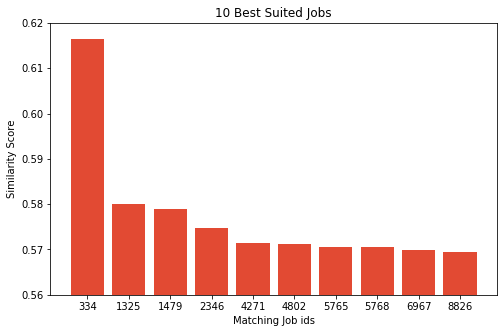

,id,company,job_title,jobdescription,experience_range,loc_name,similarity
1,334,Crystal Hiring Pvt. Ltd.,ugent opening for java j2ee developer for mumb...,Ugent opening for Java J2Ee Developer For Mum...,2,Maharashtra,0.616370
2,1325,Wissen Infotech Pvt. Ltd.,senior java developer/lead developer,Job title: Sr. Java Developer/Lead Developer ...,1,Maharashtra,0.579960
3,1479,Talent HR Networks Pvt Ltd hiring for one of t...,"job : java, j2ee, spring and webservices",Java Developer Location : Mumbai Experience :...,1,Maharashtra,0.578957
4,2346,Melstar Information Technologies Ltd,java developer,Job Description Opportunity for Java Develope...,1,Maharashtra,0.574688
5,4271,Trigent Software Limited,"opening for java dev, dotnet dev for chennai, ...","Dear Candidate, Company Profile: Trigent Soft...",0,Maharashtra,0.571531
6,4802,Capgemini,senior developer- javascript/ angular- pune- 2...,Below is the job description for your referen...,1,Maharashtra,0.571112
7,5765,quota 4 company,java programmer ex employee,Java Programmer needed Salary: Not Disclosed ...,1,Maharashtra,0.570567
8,5768,quota 4 company,java programmer ex employee,Java Programmer needed Salary: Not Disclosed ...,1,Maharashtra,0.570566
9,6967,N.G Technologies Pvt Ltd.,java developer,"B.E/B.Tech, BCA, M.Tech, B.Sc ,Are any degree...",0,Maharashtra,0.569975
10,8826,Cognizant Technology Solutions India Ltd,cognizant hiring for java cloud technology pro...,Experience in Java/ J2ee Hands onExperience ...,2,Maharashtra,0.569511


In [81]:
matched_jobs = matched_jobs.head(10)

# Plotting graph to visualize 10 best jobs

x=matched_jobs['id']
y=matched_jobs['similarity']

#plt.xticks(rotation=90)
x_pos = [i for i, _ in enumerate(x)]
x_pos
#plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.bar(x_pos, y,color='#E24A33') #'#E24A33' # my shade of red
#plt.scatter(resume['Resume_title'][2405],1,c='Red', marker='+')
axes = plt.gca()
axes.set_ylim([.56,.62])
plt.xticks(x_pos, x)
plt.xlabel("Matching Job ids")
plt.ylabel("Similarity Score")
plt.title(f"10 Best Suited Jobs")
plt.show()
matched_jobs

## Reading out my text a loud to see how close the match is with respect to selected features!!!!

In [71]:
a1= resume.loc[resume['resume_id'] == 14,'experience_desc']
print(list(a1))

['["1. project: inventory \\ncompany: iceico technologies pvt. ltd. nagpur \\ndomain: business erp \\ntechnologies: java/j2ee, spring 4.3, hibernate 5.2, \\njpa, jsp, jquery, css, mysql 5.7, bootstrap, tomcat 8.5 \\nrole: java developer \\nteam size: 2 \\nproject description: with inventory we can manage vendors, customers, \\npurchases, sales and payment data. it can effectively grow \\nbusiness with its accounting and stock maintenance feature. \\n \\n2. project: college erp \\ncompany: iceico technologies pvt. ltd. nagpur \\ndomain: educational erp \\ntechnologies: java/j2ee, maven 3.5, spring 4.3, hibernate 5.2, \\njpa, jsp, jquery, css, mysql 5.6, bootstrap, \\ntomcat 8.5 \\nrole: java developer \\nteam size: 4 \\n \\nproject description: it helps to manage all day to day task of colleges and \\nschools like student admissions, fees collection and \\naccounting, certificate processing and generation, student \\ngeneral register maintenance, teacher, student allotment \\nand promot

In [72]:
a2 = job.loc[job['j_id']==334,'jobdescription']
print(list(a2))

[' Ugent opening for Java J2Ee Developer For Mumbai and bangalore location Minimum Exp:- 7yrs Designation/ Role:- Senior Technical Staff skills Required:- Spring EJB Hibernate Weblogic, Websphere, SUN, Java, Struts,Servlets, JSF One End to end SLDC A Salary:INR 6,00,000 - 12,00,000 P.A Industry: IT-Software / Software Services Functional Area: Other Role:Other Keyskills java Desired Candidate Profile Please refer to the Job description above Company Profile: Crystal Hiring Pvt. Ltd. Hiring Consultancy Download PPT Photo 1 \xa0 View Contact Details']


In [ ]:
### EXample - JAVA BAngalore

In [91]:
# r1 contrains the only features to be matched of selected resume  13769-java, 2405 - sql dba, 9934-php , 13413- python, java-10 (mumbai)
# make yor selection and input resume id here
r1= r_df.loc[310]
r1

resume_id           310.000000
experience_range      1.000000
is_grad               1.000000
is_postgrad           0.000000
is_doc                0.000000
location             12.000000
vec_1                 1.443236
vec_2                -0.197292
vec_3                -2.271420
vec_4                -0.326457
vec_5                 0.658400
vec_6                 0.822086
vec_7                 0.321279
vec_8                -2.099194
vec_9                 1.182571
vec_10               -0.557801
vec_11                0.453758
vec_12               -0.442023
vec_13               -0.300308
vec_14                0.836898
vec_15               -0.296276
vec_16               -0.409413
vec_17               -0.006247
vec_18                0.084701
vec_19               -1.173533
vec_20                0.802276
Name: 310, dtype: float64

In [92]:
#from pool of 34,000 jobs, selecting jobs that are releated to sql dba (resume in question)
related_jobs = job.loc[job['jobtitle'].str.contains("java")] 
related_jobs=related_jobs.loc[related_jobs['location']==12]

In [93]:
# call recommender by passing selected resume 
matched_jobs = jobs_recommender(r1)

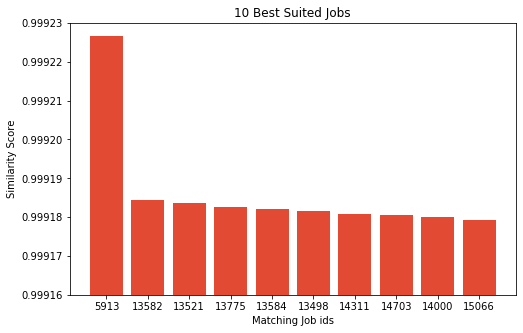

,id,company,job_title,jobdescription,experience_range,loc_name,similarity
1,5913,Unique Occupational Services Private Limited,hadoop-java professionals required,Desired Technical Skills: - Technologies Must...,2,Haryana,0.999227
4,13582,Interglobe Enterprises Limited,java angular - senior software engineer mega h...,SSE with Technical leading experience is mand...,1,Haryana,0.999184
3,13521,Confidential,cq5 - java developer - gurgaon location,"AEM (formerly known as CQ5),JQuery, Angular J...",1,Haryana,0.999184
6,13775,SummitWorks Technologies Pvt Ltd,excellent opening for java professionals in gu...,Client - CMM Level 5 Company Mode of Employm...,1,Haryana,0.999183
5,13584,Choice Consultants,se - core java and sql server or pl/sql for gu...,Urgently require SE -Java and SQL server or P...,0,Haryana,0.999182
2,13498,ASAP Info Systems Pvt Ltd,core java+ springs / pl sql development / pl s...,Greetings from ASAP Info Systems My name is P...,1,Haryana,0.999182
8,14311,Walker Digital Table Systems,technical development manager - java/maven,Position Description : Development Manager (T...,2,Haryana,0.999181
9,14703,Maven Workforce,senior architect - java/ j2ee/ spring/ webserv...,Architecture & Design : - Ensures consistency...,3,Haryana,0.999180
7,14000,Boston Software Consultants India Pvt. Ltd.,an opening for java developer for contract pos...,Greetings from The Boston Group !!! Hope you ...,1,Haryana,0.999180
11,15066,Planman HR Private Limited,java developer - frontend for gurgaon location,Responsibilities Programming to deliver high ...,1,Haryana,0.999179


In [99]:
matched_jobs = matched_jobs.head(10)

# Plotting graph to visualize 10 best jobs

x=matched_jobs['id']
y=matched_jobs['similarity']

#plt.xticks(rotation=90)
x_pos = [i for i, _ in enumerate(x)]
x_pos
#plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.bar(x_pos, y,color='#E24A33') #'#E24A33' # my shade of red
#plt.scatter(resume['Resume_title'][2405],1,c='Red', marker='+')
axes = plt.gca()
axes.set_ylim([.99916,.99923])
plt.xticks(x_pos, x)
plt.xlabel("Matching Job ids")
plt.ylabel("Similarity Score")
plt.title(f"10 Best Suited Jobs")
plt.show()
matched_jobs

In [95]:
a1= resume.loc[resume['resume_id'] == 310,'experience_desc']
print(list(a1))

["['projects undertaken: \\n• project: csts, route planner, customer service officer (cso), dashboard, data reading from qr code scanner, node js web application using express, web services. \\n• status: in progress \\n• tools/languages: struts2 framework, springmvc, node js, basic knowledge of angular js, hibernate, html, css, jquery, my sql database \\n \\nproject description: \\n• a csts (cylinder serial trancking system ) is used as tracking system of cylinders based on their serial number or cylinder id. \\n \\n• this project is for ugs(unique gas solution ) which deals with cylinders in singapore and it keeps the record of each cylinder where it is placed, delivered to outlet or not, and staus of the each cylinder. \\n \\n• route planner is used to send and recive the sms of customer and then application assign the task to dm(delivery man) for cylinder delivery, meter reading or payment collection. \\n \\n• customer service officer application is used for technician mobile applic

In [97]:
a2 = job.loc[job['j_id']==13582,'jobdescription']
print(list(a2))

[' SSE with Technical leading experience is mandatory. 4-5 years of Java, JEE experience. In depth knowledge and hands on experience in Spring Framework (Core, MVC, Security, Roo, Web services, Web flow). Hands on experience in JPA/Hibernate Sound knowledge in developing and tuning SQL scripts (My SQL / Oracle). Hands on experience in JBOSS, Tomcat Experience on Spring source Tool Suite (STS), Eclipse Experience on Junit test Experience on web services framework like Axis (JAX-WS), CXF (JAX-WS), SOAP, REST Strong knowledge in architecture, agile development method, design patterns, OOAD and UML.Oracle Certified Programmer, Spring source Certified Programmer knowledge on JEE (EJBs) or Seam or any other Java Framework Knowledge on any of the ORM tools ( Toplink, iBatis) Knowledge on the Ant / Maven build tool Knowledge on WEBLOGIC or GLASSFISH or TCSERVER Knowledge on NetBeans or JDeveloper or Any other Java IDE Knowledge on Jasper or Crystal Reports knowledge on Drools, jBPM, JBOSS ESB 

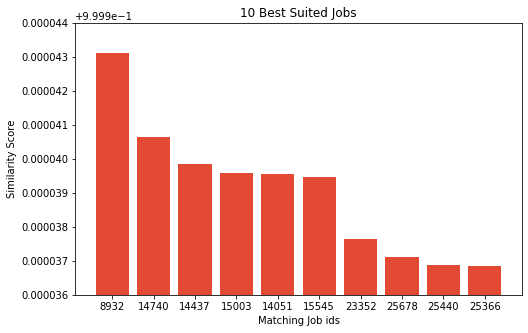

,id,company,job_title,jobdescription,experience_range,loc_name,similarity
2,8932,Leading Software Development MNC,junior software engineer/ fresher (java/ .net/...,We are urgently looking for Software Develope...,0,Delhi,0.999943
5,14740,triptom.com,php web developer/web designer,Triptom.com - An ecommerce startup urgently r...,1,Delhi,0.999941
4,14437,Premium hiring for Client of Pinnacle Solutions,sr. software engineer - php - ecommerce startup,Key requirements/ Profile: - - B.Tech/ CS/ MC...,1,Delhi,0.999940
6,15003,Daphnis Labs,full stack php developer -0 start up,Job Description Join us as an PHP Developer a...,1,Delhi,0.999940
3,14051,Webtek Labs Pvt. Ltd.,walk-in interview for jr. php trainer from 4th...,Inviting all Fresher pass out candidates of B...,0,Delhi,0.999940
7,15545,Premium hiring for Client of Pinnacle Solutions,tech lead - php / open source - ecommerce,Detailed Job Description : - About 5-10 years...,1,Delhi,0.999939
8,23352,Web Media Makers,sr. web developer / php developer,Job Description: Minimum 2 Years of experienc...,1,Delhi,0.999938
15,25678,IBDTD,php developer,• you possess a solid understanding of androi...,1,Delhi,0.999937
14,25440,zNoow Technologies Pvt. Ltd,sr. php developer,DESCRIPTION Are you passionate about programm...,1,Delhi,0.999937
13,25366,PROUD TECHNOLOGIES PVT. LTD,php developer,JOB DESCRIPTION We are looking for a PHP deve...,1,Delhi,0.999937


In [108]:
##
#983 php
r1= r_df.loc[983]


#from pool of 34,000 jobs, selecting jobs that are releated to sql dba (resume in question)
related_jobs = job.loc[job['jobtitle'].str.contains("php")] 
related_jobs=related_jobs.loc[related_jobs['location']==9]
# call recommender by passing selected resume 
matched_jobs = jobs_recommender(r1)
matched_jobs = matched_jobs.head(10)

# Plotting graph to visualize 10 best jobs

x=matched_jobs['id']
y=matched_jobs['similarity']

#plt.xticks(rotation=90)
x_pos = [i for i, _ in enumerate(x)]
x_pos
#plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.bar(x_pos, y,color='#E24A33') #'#E24A33' # my shade of red
#plt.scatter(resume['Resume_title'][2405],1,c='Red', marker='+')
axes = plt.gca()
axes.set_ylim([.999936,.999944])
plt.xticks(x_pos, x)
plt.xlabel("Matching Job ids")
plt.ylabel("Similarity Score")
plt.title(f"10 Best Suited Jobs")
plt.show()
display(matched_jobs)


In [110]:
a1= resume.loc[resume['resume_id'] == 983,'experience_desc']
print(list(a1))

["['designing, developing, coding, testing and debugging system software; reviewing code and design; validating new product designs; supporting quality assurance (qa) and optimizing input/ output (i/o) performance; providing post-production support \\n \\nproviding technical support in the design and development of websites; assisting in the development of new websites or enhancement of existing website based on customer requirements \\n \\ndeveloping php back-end for websites / web applications with services like mysql; actively doing front-end with responsive web design using html, css and media-queries, reactjs, angularjs, google map apis', 'understand requirement and developed new websites for the company. \\nmaintenance existing websites of the company. \\nseo of the website according to event. \\ndesign add and banners for the event. \\npurchase domain and hosting for the new website.', 'responsibilities as seo executive \\n➢ website analysis \\n➢ keyword analysis \\n➢ meta tag p

In [109]:
a2 = job.loc[job['j_id']==8932,'jobdescription']
print(list(a2))

[' We are urgently looking for Software Developer/ Programmer (Freshers) for various available positions. Candidates interested in following requirements can apply for selection process. 1) Java/ J2ee Developer 2) .Net, C# Developers 3) Software Test Engineer/ QA 4) PHP/ MySQL Developer 5) Technical Support/ Engineer Applicant should be BE/ B.Tech/ BCA/ MCA or BSc/ MSc (Computer Science/ IT) or Equivalent Excellent knowledge/ skills in above mentioned technologies Salary:INR 2,25,000 - 3,50,000 P.A Industry: IT-Software / Software Services Functional Area: IT Software - Application Programming , Maintenance Role Category:Programming & Design Role:Software Developer Keyskills Java MySQL J2Ee .Net PHP Software Engineering Testing Quality Assurance Engineering Test Engineering Fresher Trainee Entry Level Asp .Net C# C++ Desired Candidate Profile Education- UG: B.Tech/B.E. - Computers, Electronics/Telecommunication, Instrumentation, B.Sc - Computers, BCA - Computers PG:M.Tech - Computers, 

## Example with developer

In [184]:
related_jobs = job.loc[job['jobtitle'].str.contains("developer")]

In [185]:
# call recommender by passing selected resume 
matched_jobs = jobs_recommender(r1)
matched_jobs = matched_jobs.head(10)

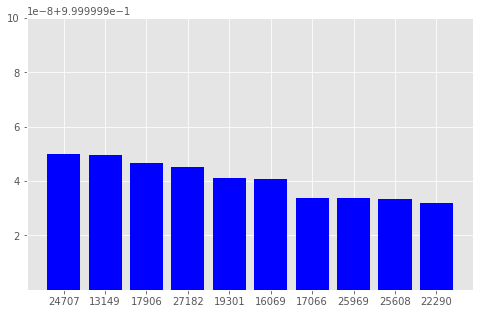

,id,company,job_title,jobdescription,experience_range,location,similarity
2492,24707,Hirexa Solutions Pvt. Ltd.,mdm infosphere developer,Job Description Send me Jobs like this MDM I...,2,30,1.0
1465,13149,Diksha Technologies,tibco iprocess developers,Job Description Send me Jobs like this Exper...,1,16,1.0
1832,17906,Green HR Solutions hiring for Service based co...,pentaho architect (pentaho bi developer),Job Description Send me Jobs like this Desig...,1,20,1.0
2721,27182,Midasis Technologies Pvt. Ltd.,java developer _ chennai,Job Description Send me Jobs like this Exp: ...,1,30,1.0
2007,19301,Blue Bird Technologies Pvt. Ltd. hiring for Cl...,java/ j2ee developer,Job Description Send me Jobs like this 1. Co...,1,20,1.0
1661,16069,Confidential,senior perl developer,Job Description Send me Jobs like this * 5+ ...,1,16,1.0
1748,17066,Value Search,software developer / architect - sharepoint,Job Description Send me Jobs like this Posit...,2,20,1.0
2576,25969,CBSI India Pvt. Ltd.,java developer with spring and hibernate: 4-8 ...,Job Description Send me Jobs like this Java ...,1,30,1.0
2542,25608,GE,sr solutions developer - business solutions,Job Description Send me Jobs like this Role ...,1,30,1.0
2298,22290,Bobtech Solutions Private Limited,onsite opportunity for liferay portal developer,Job Description Send me Jobs like this Java ...,1,30,1.0


In [214]:
# Plotting graph to visualize 10 best jobs
x=matched_jobs['id']
y=matched_jobs['similarity']
#plt.xticks(rotation=90)
x_pos = [i for i, _ in enumerate(x)]


#plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.bar(x_pos, y,color='blue') # my shade of red
#plt.scatter(resume['Resume_title'][2405],1,c='Red', marker='+')
axes = plt.gca()
axes.set_ylim([.9999999,1])
plt.xticks(x_pos, x)
plt.show()
matched_jobs

In [200]:
a1= resume.loc[resume['resume_id'] == 1,'experience_desc']
print(list(a1))

["['working as software developer at ingroinfo software solutions pvt ltd \\nwith 1 year 2 month (01/2019- present) of experience in different phases of software development including front-end to back-end development, \\ndatabase. \\n \\nexperience in mysql, java, j2ee, spring, hibernate, oracle 11g \\n \\nexperience on support, maintenance and bug fixes.']"]


In [206]:
a2 = job.loc[job['j_id']==13149,'jobdescription']
print(list(a2))

["Job Description \xa0 Send me Jobs like this Expertise on TIBCO Business Works 5.x and TIBCO EMS Strong Web Services & JMS skills. Hands on experience on TIBCO Administrator/ App Manage Scripting Deployment, TIBCO Adapters (File, ADB, Etc) Should possess strong Java/ J2EE skills. In depth knowledge of TIBCO Business Events. Strong understanding of the SDLC from idea inception through scoping, requirements gathering, architecting, design, QA, deployment, maintenance support, and change management. Salary: Not Disclosed by Recruiter Industry: Telecom/ISP / Functional Area: IT Software - Application Programming , Maintenance Role Category:Programming & Design Role:Software Developer Keyskills TIBCO iProcess Developers Desired Candidate Profile Education- UG: Any Graduate PG:Any Postgraduate Doctorate:Any Doctorate - Any Specialization, Doctorate Not Required Please refer to the Job description above Company Profile: Diksha Technologies Diksha was envisioned in the early 2000 by the count

In [ ]:
#reading experience description 

resume_all_desc = []
for index, rows in resume.loc[1]:
    #print('#@#@#@#@#@@#@#@#@#@##@@#@#@@##@#@#@#@#@#@##@#@#@##@#@@#@#@#')
    #print(f'resume no. {index}')
    resume_desc= []
    #pick work experience col and read it as JSON 
    
    work = resume['work_experiences'][index]
    try: result_work = eval(work)
    except: continue
    #print(f'resume  :  {index}')
    #read description to match with job
    
    for i in result_work:    
        w_title = (result_work[i][0]['wtitle:']) 
        print(w_title)
        w_company= (result_work[i][1]['wcompany:'])
        print(w_company)
#         resume_desc.append(w_company) 
        w_city= (result_work[i][2]['wcity:'])
        w_state= (result_work[i][3]['wstate:'])
        w_duration= (result_work[i][4]['wduration:'])
           
        w_descr= (result_work[i][5]['wdescr:'])
        if  (w_descr == 'none'):
            continue
        #print(w_descr)
        #print('**************')
        resume_desc.append(w_descr + '')   
        
    #print(resume_desc)
    resume_all_desc.append(resume_desc)
#print(resume_test)
resume['experience_desc'] = resume_all_desc

In [183]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14428 entries, 0 to 14427
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   14428 non-null  int64  
 1   Resume_title            14428 non-null  object 
 2   City                    14428 non-null  object 
 3   location                14428 non-null  int64  
 4   Description             14428 non-null  object 
 5   work_experiences        14428 non-null  object 
 6   Educations              14428 non-null  object 
 7   Skills                  14428 non-null  object 
 8   Links                   14428 non-null  object 
 9   Certificates            14428 non-null  object 
 10  Additional Information  14428 non-null  object 
 11  is_grad                 14428 non-null  int64  
 12  is_postgrad             14428 non-null  int64  
 13  is_doc                  14428 non-null  int64  
 14  edu_unknown             14428 non-null